In [1]:
#Lets load the data into python and take a look at it
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset =pd.read_csv(r"E:\soda.csv")
dataset.head()


,temperature,units_sold
0,44.0,2600.0
1,96.0,12126.0
2,96.0,12107.0
3,36.0,1639.0
4,42.0,2400.0


In [2]:
#Let's get some information about our dataset
dataset.describe()

,temperature,units_sold
count,50.000000,50.000000
mean,62.720000,5699.840000
std,20.945059,3619.349493
min,30.000000,1042.000000
25%,44.000000,3037.500000
50%,60.500000,4992.000000
75%,77.000000,7503.500000
max,99.000000,13194.000000


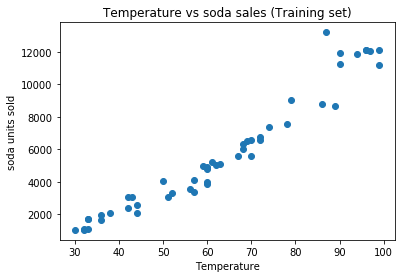

In [4]:
#scatter plot
plt.scatter(dataset.temperature,dataset.units_sold);
plt.title('Temperature vs soda sales (Training set)');
plt.xlabel('Temperature');
plt.ylabel('soda units sold');


In [5]:
#preprocessing
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,: 1].values

In [7]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size =0.3)

In [9]:
#MODEL BUILDING
from sklearn.preprocessing import PolynomialFeatures

#EXTRACTING POLYNOMIAL FEATURES
poly =PolynomialFeatures(degree =2)
X_train_poly =poly.fit_transform(X_train)
X_test_poly =poly.fit_transform(X_test)

In [10]:
X_train[0:5]

array([[44.],
       [33.],
       [70.],
       [90.],
       [94.]])

In [12]:
print(X_train_poly[0:5])

[[1.000e+00 4.400e+01 1.936e+03]
 [1.000e+00 3.300e+01 1.089e+03]
 [1.000e+00 7.000e+01 4.900e+03]
 [1.000e+00 9.000e+01 8.100e+03]
 [1.000e+00 9.400e+01 8.836e+03]]


In [16]:
from sklearn.linear_model import LinearRegression

#CREATE LINEAR REGRESSOR USING LINEAR REGRESSION

regressor =LinearRegression()

#TRAINING OUR MODEL
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

In [17]:
y_pred

array([[44.],
       [87.],
       [62.],
       [78.],
       [60.],
       [52.],
       [57.],
       [79.],
       [36.],
       [67.],
       [57.],
       [60.],
       [59.],
       [33.],
       [96.]])

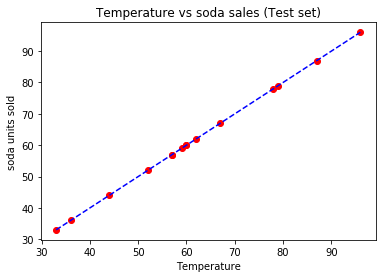

In [20]:
#LET'S SEE HOW WELL THE MODEL DOES AGAINST UR TEST DATA
plt.scatter(X_test, y_test ,color ='red')
plt.plot(sorted(X_test),sorted(y_pred),  '--', color ='blue')
plt.title('Temperature vs soda sales (Test set)');
plt.xlabel('Temperature')
plt.ylabel('soda units sold')
plt.show()

In [22]:
from sklearn.metrics import explained_variance_score, mean_absolute_error,mean_squared_error,r2_score

ex_var_score =explained_variance_score(y_test,y_pred)
m_absolute_error =mean_absolute_error(y_test,y_pred)
m_squared_error =mean_squared_error(y_test,y_pred)
r_2_score = r2_score(y_test,y_pred)

print("Explained variance score:" +str(ex_var_score))
print("Mean absolute error:" +str(m_absolute_error))
print("mean squared error:" +str(m_squared_error))
print("R squared score:" +str(r_2_score))

Explained variance score:1.0
Mean absolute error:2.430056156299543e-13
mean squared error:8.496978582316562e-26
R squared score:1.0
